## Variables of interest and model

In this section we will analyze selected characteristics from the listed sites available in the *listings* dataframe and if they hold any relationship with the price listed on the same table.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

listings_df = pd.read_csv('./boston_airbnb/listings.csv')

# Fix format and data type of the price column
listings_df['price'] = listings_df['price'].str[1:]
listings_df['price'] = listings_df['price'].str.replace(',','')
listings_df['price'] = pd.to_numeric(listings_df['price'])

We have some features of the properties that can be measured numerically, namely :

1. Number of people fitting in the place
2. Number of bathrooms
3. Number of bedrooms
4. Number of beds

We will isolate these to later study their influence on the price offered for the rental. All the features have missing data, so to address this, we will impute the mean for each of the columns.

In [2]:
# Isolate numeric variables of interest
numeric_vars_df = listings_df[['id','accommodates','bathrooms','bedrooms','beds']].copy()

# Impute column mean to missing values
fill_mean = lambda col: col.fillna(col.mean())
numeric_vars_df = numeric_vars_df.apply(fill_mean)

Now we will see if there is any linear relationship between these numeric variables using a correlation matrix. We will add the price to the analysis.

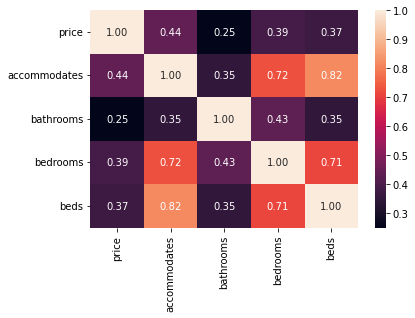

In [3]:
numeric_vars_df_corr = listings_df[['price','accommodates','bathrooms','bedrooms','beds']].copy()
sns.heatmap(numeric_vars_df_corr.corr(), annot=True, fmt=".2f");

We will build a linear model using only numeric variables. We will test the values predicted by the model against the actual ones in order to get a correlation coefficient.

In [22]:
#Define a function for obtaining r2
def model_score(X_input,y_input):
    X = X_input
    y = y_input
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
    
    #Instantiate
    lm_model = LinearRegression(normalize=True)
    
    #Fit
    lm_model.fit(X_train, y_train) 
    
    # Score
    y_test_preds = lm_model.predict(X_test)
    score = r2_score(y_test, y_test_preds)
    
    return score

In [23]:
#Obtain score for the first model
model_score(numeric_vars_df.drop('id', axis = 1),listings_df['price'])

0.1694187521637126

In order to improve the correlation coefficient, we will add categorical variables describing some of the properties' and hosts' features. There are also missing items within the categorical variables, so we will impute the mode to those cases.

In [25]:
# Retrieve categorical variables
categorical_vars_df = listings_df[['id',
                                   'host_has_profile_pic',
                                   'host_identity_verified',
                                   'neighbourhood_cleansed',
                                   'property_type',
                                   'bed_type'
                                  ]].copy()

# Impute mode
fill_mode = lambda col: col.fillna(col.mode())
categorical_vars_df = categorical_vars_df.apply(fill_mode)

We will merge numeric and non numeric features in a single table, then we will dummy the categorical variables in order to build the improved model

In [26]:
# Merge tables on id
interest_variables_df = numeric_vars_df.merge(categorical_vars_df, how='inner', on='id')

# Dummy categorical variables
interest_variables_df_dummies = pd.get_dummies(interest_variables_df)

Now we will crete and score a new model which incorporates the effect of the categorical variables and print the obtained correlation coefficient using our model_score function

In [27]:
#Obtain score for the second model
model_score(interest_variables_df_dummies.drop('id', axis=1),listings_df['price'])

0.2604727739675675